In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math

In [2]:
data=pd.read_excel("slr08.xls")

*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


In [3]:
data

,X,Y
0,75.1,577.8
1,74.3,577.0
2,88.7,570.9
3,114.6,578.6
4,98.5,572.4
5,112.0,411.2
6,114.8,531.7
7,62.2,563.9
8,107.0,406.7
9,90.5,507.1


In [4]:
data.isnull().sum()

X    0
Y    0
dtype: int64

<AxesSubplot:xlabel='X'>

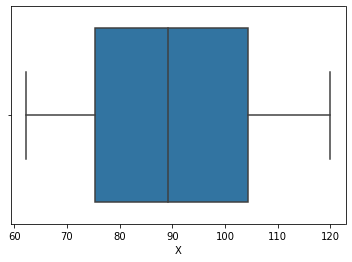

In [5]:
sns.boxplot(data['X'])

<AxesSubplot:xlabel='Y'>

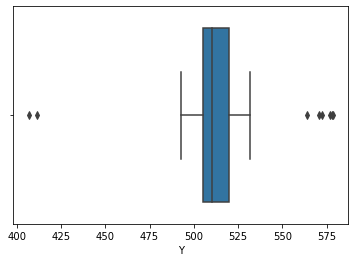

In [6]:
sns.boxplot(data['Y'])

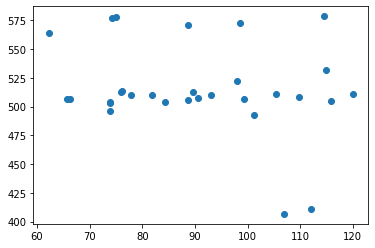

In [7]:
from scipy import stats
data['z_score_y']=stats.zscore(data['Y'])
data=data[data['z_score_y'].abs()<=3]
plt.scatter(data['X'],data['Y'])

<AxesSubplot:xlabel='Y'>

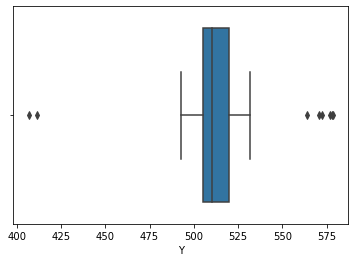

In [8]:
sns.boxplot(data['Y'])

In [9]:
data

,X,Y,z_score_y
0,75.1,577.8,1.616561
1,74.3,577.0,1.595979
2,88.7,570.9,1.439048
3,114.6,578.6,1.637142
4,98.5,572.4,1.477638
5,112.0,411.2,-2.669456
6,114.8,531.7,0.430574
7,62.2,563.9,1.258964
8,107.0,406.7,-2.785225
9,90.5,507.1,-0.202295


### Normalization

In [10]:
def normalize(d):
    min_d=min(d)
    max_d=max(d)
    result=[]
    diff=max_d-min_d
    for i in d:
        result.append((i-min_d)/diff)
    return result  

In [11]:
import numpy as np
x=np.array(normalize(data['X']))
y=np.array(normalize(data['Y']))
l=0.1

### BGD

In [12]:
def y_value(m,c,x):
    y=[]
    for i in x:
        y_v=m*i+c
        y.append(y_v)
    return y

In [13]:
def error(y_actual,y_predicted):
    e=(y_actual-y_predicted)
    e=e**2
    e=e.sum()
    e=e/(2*len(y_actual))
    return e

In [14]:
def gradient(m,c,y_actual,y_predicted,x):
    g_m=(y_actual-y_predicted)*(-1)*x
    g_c=(y_actual-y_predicted)*(-1)
    m=m-l*(g_m.sum()/len(y_actual))
    c=c-l*(g_c.sum()/len(y_actual))
    return m,c

In [15]:
def bgd_linear_regression(x,y):
    m=1
    c=-1
    e_list=[]
    for i in range(30):
        y_predicted=y_value(m,c,x)
        y_actual=y
        e=error(y_actual,y_predicted)
        m,c=gradient(m,c,y_actual,y_predicted,x)
        e_list.append(e)
    return m,c,e_list

### Data Split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.10)

### Training model

In [18]:
m_train,c_train,e_list_train=bgd_linear_regression(x_train,y_train)

### Testing model

In [20]:
m_test,c_test,e_list_test=bgd_linear_regression(x_test,y_test)

In [21]:
def final_error(m,c):
    mse=0
    mae=0
    for i,j in zip(x,y):
        y_predicted=m*i+c
        y_actual=j
        d=y_actual-y_predicted
        mse+=d*d
        mae+=d
    return 0.5*mae,0.5*mse,math.sqrt(0.5*mse)

### Error metrics for training data

In [22]:
mae,mse,rmse=final_error(m_train,c_train)

print("MAE of trained data is "+str(mae))
print("MSE of trained data is "+str(mse))
print("RMSE of trained data is "+str(rmse))

MAE of trained data is 0.4615000578048351
MSE of trained data is 2.991427552835456
RMSE of trained data is 1.7295743848807013


### Error metrics for test data

In [23]:
mae,mse,rmse=final_error(m_test,c_test)

print("MAE of trained data is "+str(mae))
print("MSE of trained data is "+str(mse))
print("RMSE of trained data is "+str(rmse))

MAE of trained data is 5.542373344481224
MSE of trained data is 4.773785979964874
RMSE of trained data is 2.184899535439759


### Predicting on trained data

In [26]:
def predict(x):
    min_d=min(data['X'])
    max_d=max(data['Y'])
    diff=max_d-min_d
    x=(x-min_d)/diff
    y=m_train*x+c_train
    y=(y*(max(data['Y'])-min(data['Y'])))+min(data['Y'])
    return y

In [27]:
predict(80)

419.7932737416062

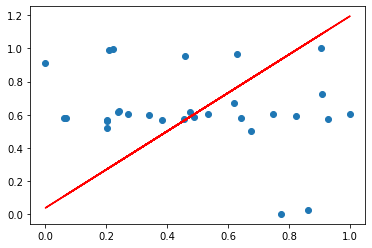

In [28]:
plt.scatter(x,y)
plt.plot(x_train,m_train*x_train+c_train,color='red')